<h1>PAGERANK</h1>

<p>In this lab we will do the PageRank algorithm and the data we're going to use is from http://snap.stanford.edu/data/soc-sign-bitcoinotc.html. Basically it is a network of people who trade using Bitcoin on a platform called Bitcoin OTC. Each investor has a rating and for our propourse we will work with the ones with rating greater or equal to 8.
</p>
<p>Once we have the PageRank for each inverstor so we will be albe to answer the following questions:
    <li type="circle">How many iterating the algorithm will run until to converge?</li>
    <li type="circle">Which are the most important inverstor according to the PageRank? and which are their PageRank values?</li>
    <li type="circle">How would I use PageRank if I was starting to invert on Bitcoins?</li>
</p>

In [201]:
import numpy as np
import pandas as pd
import nltk as nltk
import math
import operator
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/manorlf/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

<p>Loaging the data values into a Pandas DataFrame<p/>

In [202]:
data_set = pd.read_csv('../data/soc-sign-bitcoinotc.csv')
data_set.columns = ['source', 'target', 'rating', 'time']
data_set.head()


,source,target,rating,time
0,6,5,2,1.289242e+09
1,1,15,1,1.289243e+09
2,4,3,7,1.289245e+09
3,13,16,8,1.289254e+09
4,13,10,8,1.289254e+09


<p>Here we'll chose the ones with rating greater or equals to 8.</p>

In [203]:
#Filtering The ones with rating grater or iqual to 8

new_data = data_set.loc[data_set['rating'] >= 8]
new_data.index = np.arange(0, len(new_data))


<p>Once we have selected the investor which we will analyse we will put all of them (source and target) in a list to better manipulateit .</p>

In [204]:
#Mapping sorce and target to a list
matter_inverstors = list(set(new_data.source).union(set(new_data.target)))


<p>We're going to map each source with his respectives targets so we'll get a adjacence list. </p>

In [205]:
adj_dict = dict()

In [206]:
def fill_adj(adj_dict, data_set, matter_inverstors):
    for index in range(data_set.shape[0]):
        add_to_adj(adj_dict, matter_inverstors.index(data_set.loc[index,'source']), matter_inverstors.index(data_set.loc[index,'target']))
        
def add_to_adj(adj, source, target):
    if (source in adj):
        adj[source].append(target)
    else:
        adj[source] = [target]
    
    if (target not in adj):
        adj[target] = []


<p>With all data on hands so it is time to create the <b>Transition Matrix</b>.
    For each node (which means inverstor) we will put a weight. How do we calculate it?
    It'll be one divided by the total of adjacents nodes, and for each adjacent node colum will have that weight.
<p/>

In [207]:
def fill_transition_matrix(transition_matrix, adj_dict):
    for node in adj_dict.keys():
        adjacents = adj_dict[node]
        if (len(adjacents) > 0):
            weight = 1.0/len(adjacents)
            for adj in adjacents:
                transition_matrix[adj][node] = weight


In [208]:
#Constants
TOTAL_NODES = len(matter_inverstors)
DAMPING_FACTOR = 0.15
ALPHA = 0.85
NORM = 1.0/float(TOTAL_NODES)

In [209]:
fill_adj(adj_dict, new_data, matter_inverstors)

<p>So Time to build the transition matrix
Initially it will be a matrix with the dimention total of nodes analyzed, so it gonna be about 915x915 according with our data. Once the initial matrix created so will fill with the right values.
</p>

In [210]:
'''
    Original Transition Matrix
'''

transition_matrix = np.zeros((TOTAL_NODES, TOTAL_NODES))

In [211]:
'''
    Filling the values for each node that is linked with others
'''
fill_transition_matrix(transition_matrix, adj_dict)

<p>
    <b>Google Matrix</b>  with damping factor 0.15.
</p>

In [212]:
'''
    Google Matrix m with dumping factor 0.15
'''
dumping_matrix_factor = np.ones((TOTAL_NODES, TOTAL_NODES))
dumping_matrix_factor = (NORM * np.matrix(dumping_matrix_factor))


In [213]:
m = ALPHA * transition_matrix + DAMPING_FACTOR * dumping_matrix_factor

<p>
    <b>Normalized Vector</b> for juping value to the onew which would be zero

</p>

In [214]:
'''
    Original Normalized Vector
'''
normalized_vector = np.ones((TOTAL_NODES, 1))
normalized_vector = (NORM * np.matrix(normalized_vector))

<h3>PageRank Algorithm</h3>

In [215]:
cont = 0

def pagerank(v):
    global cont
    calc = sum(abs(m * v - v))
    if (calc > 0.001):
        cont += 1
        return pagerank(m * v)
    else:
        cont += 1
        return m * v
    
    

In [216]:
v = normalized_vector
result = pagerank(v)



In [232]:
result_list = []
for i in result:
    result_list.append(i.item())


<p>The total of iteration that the algorithm did until get convergence was:</p>

In [234]:
print(cont)

35


<p> 
    <b>35</b> iteratinons and the pagerank was calculated. So the better saw inverstor was teh following:
</p>

In [228]:
ranked_df = pd.DataFrame({'nodes':matter_inverstors, 'pagerank':result_list})
ranked_df.sort_values('pagerank', ascending=False).take(range(5))

,nodes,pagerank
0,1,0.000139
120,202,0.000125
94,144,0.000117
887,3996,0.000093
182,361,0.000092


<p>Once we have all data we will put it in csv file in order to generate the visual thing, I mean a grephic with the nodes and edges, of couse including the pagerank value to compare with others.

        <p>As is in the grephic we can see five colored node which are our best inverstor, so if I was going to invest in Bitcoins sure those guys would be in my list as reference and contarts to trade with them. As they got a good pagerank the are influent in the market.</p>
        
</p>

In [231]:
ranked_df.to_csv(path_or_buf='results/result.csv', index=False)
new_data.to_csv(path_or_buf='results/filtered-sign-bitcoinotc.csv', columns=['source', 'target', 'rating'], index=False)

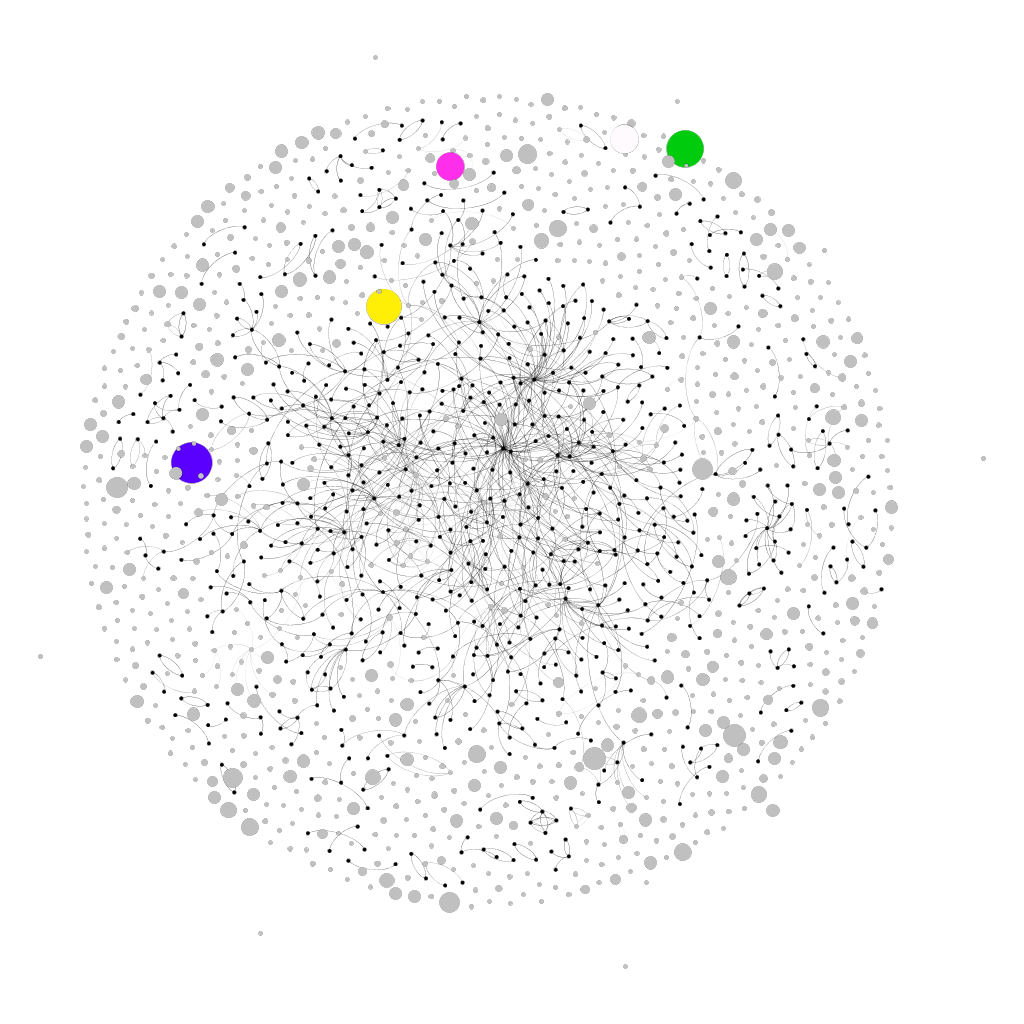